### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, PowerTransformer, RobustScaler
from sklearn.compose import ColumnTransformer

### Loading Dataset

In [2]:
df = pd.read_csv("/content/medical_insurance.csv")

### EDA

In [3]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
2529,39,male,32.340,2,no,southeast,6338.07560
2725,56,female,39.820,0,no,southeast,11090.71780
2112,41,male,28.405,1,no,northwest,6664.68595
2751,46,male,25.800,5,no,southwest,10096.97000
312,43,male,35.970,3,yes,southeast,42124.51530


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(2772, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Creating new column bmi_category
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

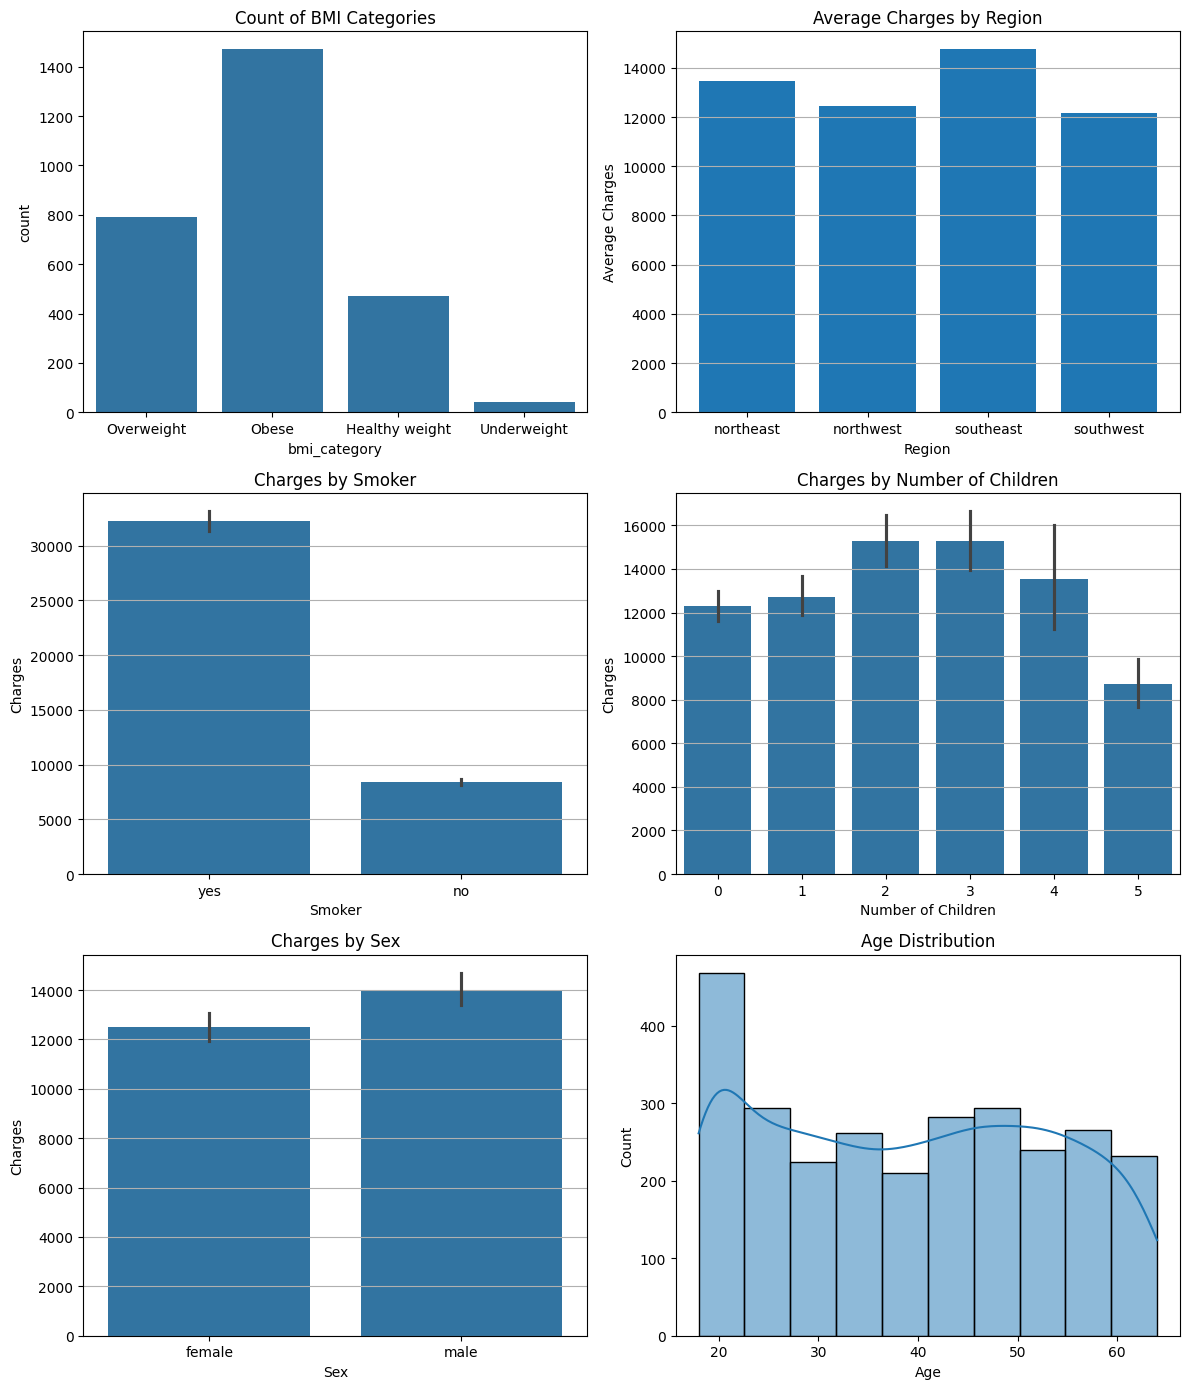

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(12,14))

sns.countplot(x='bmi_category', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Count of BMI Categories')

average_charges_by_region = df.groupby('region')['charges'].mean().reset_index()
axs[0, 1].bar(average_charges_by_region['region'], average_charges_by_region['charges'])
axs[0, 1].set_title('Average Charges by Region')
axs[0, 1].set_xlabel('Region')
axs[0, 1].set_ylabel('Average Charges')
axs[0, 1].grid(axis='y')

sns.barplot(x='smoker', y='charges', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Charges by Smoker')
axs[1, 0].set_xlabel('Smoker')
axs[1, 0].set_ylabel('Charges')
axs[1, 0].grid(axis='y')

sns.barplot(x='children', y='charges', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Charges by Number of Children')
axs[1, 1].set_xlabel('Number of Children')
axs[1, 1].set_ylabel('Charges')
axs[1, 1].grid(axis='y')

sns.barplot(x='sex', y='charges', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Charges by Sex')
axs[2, 0].set_xlabel('Sex')
axs[2, 0].set_ylabel('Charges')
axs[2, 0].grid(axis='y')

sns.histplot(df['age'], bins=10, kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Age Distribution')
axs[2, 1].set_xlabel('Age')
axs[2, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


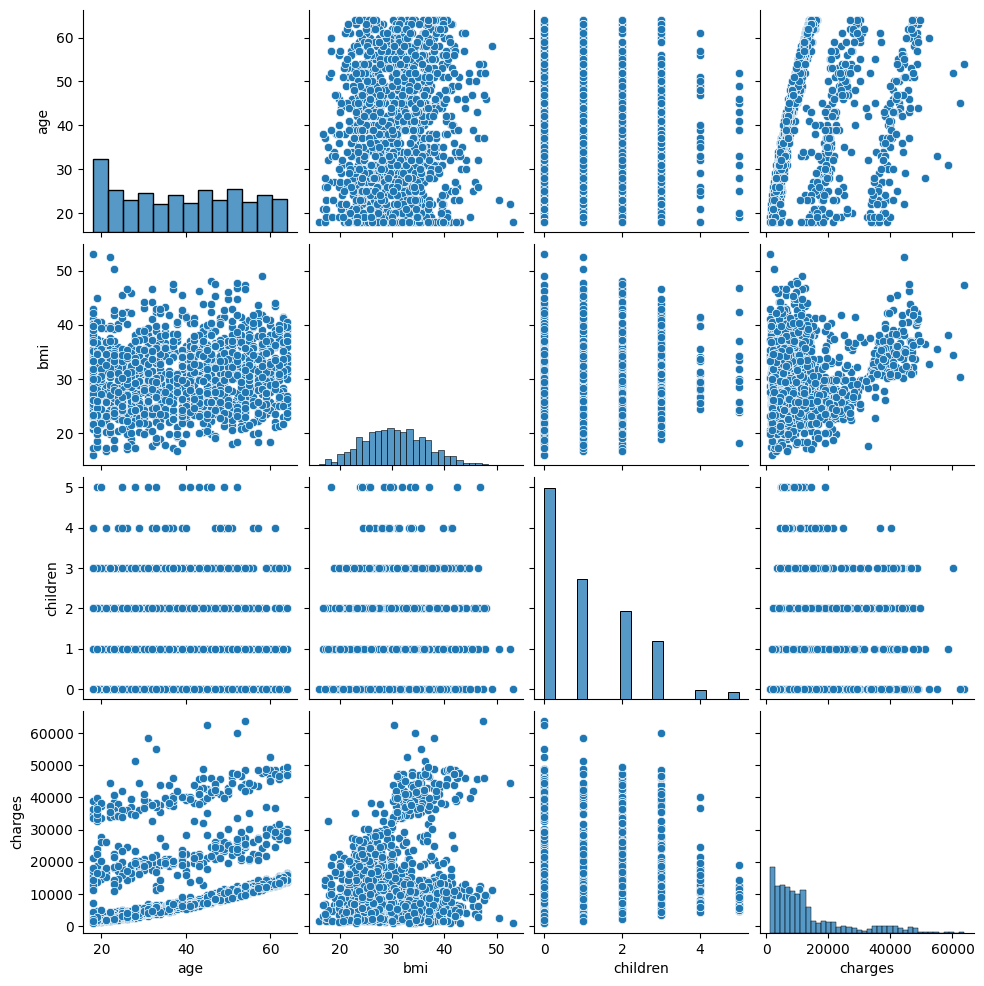

In [10]:
sns.pairplot(data=df)
plt.show()

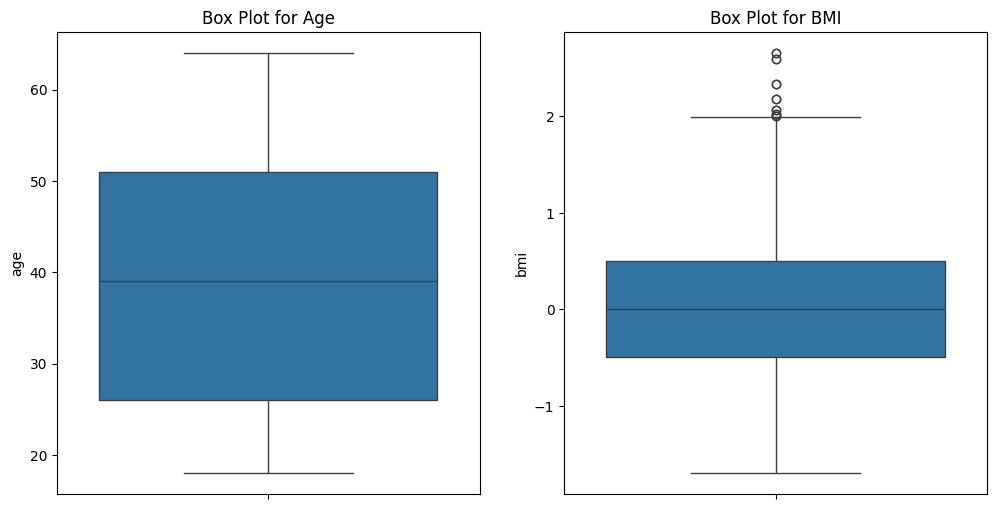

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y='age', data=df, ax=axs[0])
axs[0].set_title('Box Plot for Age')

sns.boxplot(y='bmi', data=df, ax=axs[1])
axs[1].set_title('Box Plot for BMI')

plt.show()

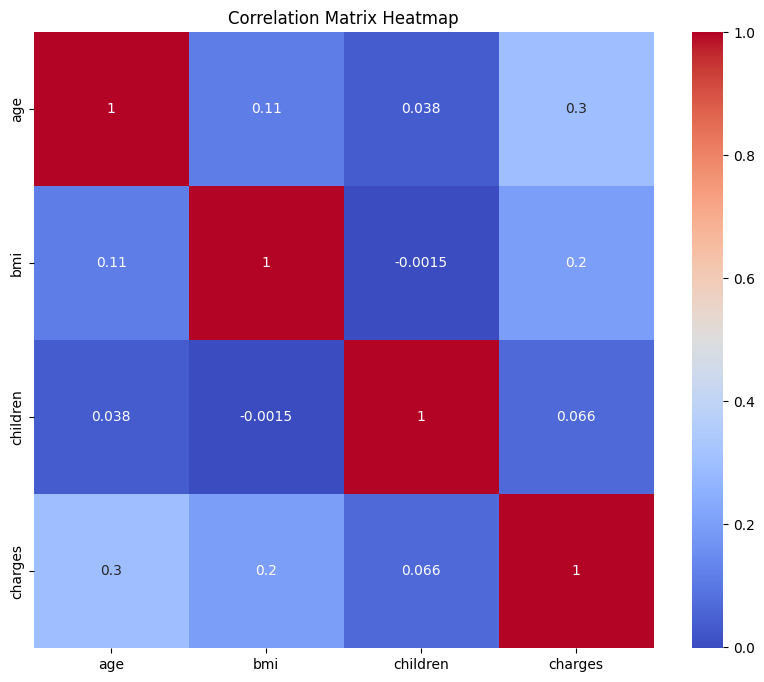

In [12]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# correlation matrix
corr_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Scaling BMI values

In [13]:
scaler = RobustScaler()

df[['bmi']] = scaler.fit_transform(df[['bmi']])

print(df.head())

   age     sex       bmi  children smoker     region      charges  \
0   19  female -0.297953         0    yes  southwest  16884.92400   
1   18    male  0.388596         1     no  southeast   1725.55230   
2   28    male  0.298538         3     no  southeast   4449.46200   
3   33    male -0.905556         0     no  northwest  21984.47061   
4   32    male -0.183333         0     no  northwest   3866.85520   

     bmi_category  
0      Overweight  
1           Obese  
2           Obese  
3  Healthy weight  
4      Overweight  


### Spliting data into training and testing set

In [14]:
x=df.drop(columns=['charges','bmi_category'])
y=df['charges']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=100)

#### Data Transformation: Encoding Categorical Variables and Normalizing Age

In [16]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=True),['sex','smoker','region']),
    ('yeo-johnson', PowerTransformer(), ['age'])
],remainder='passthrough')

x_train_transformed=transformer.fit_transform(x_train)
x_test_transformed=transformer.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Linear Regression Model

In [17]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train_transformed, y_train)

y_test_pred_lr = linear_reg_model.predict(x_test_transformed)

mse = mean_squared_error(y_test, y_test_pred_lr)
r2 = r2_score(y_test, y_test_pred_lr)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)

Mean Squared Error (MSE): 33871092.73593269
R-squared (R2) score: 0.7416513635070527


#### Polynomial Regression Model

In [31]:
poly_features = PolynomialFeatures(degree=2)

x_train_poly = poly_features.fit_transform(x_train_transformed)
x_test_poly = poly_features.transform(x_test_transformed)

poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly, y_train)

y_test_pred_poly=poly_reg_model.predict(x_test_poly)

mse = mean_squared_error(y_test, y_test_pred_poly)
r2 = r2_score(y_test, y_test_pred_poly)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)

Mean Squared Error (MSE): 22251448.559211314
R-squared (R2) score: 0.8302791279843572


In [34]:
# cross-validation
cv_scores = cross_val_score(poly_reg_model, x_test_poly, y_test, cv=10, scoring='r2')

# mean R2 score
mean_cv_score = np.mean(cv_scores)
print("Mean Cross-Validation R2 score:", mean_cv_score)

Mean Cross-Validation R2 score: 0.8199606611225512


## Conclusion

During analysis of the medical insurance dataset, several key insights were uncovered:

- 🚬 **Smokers tend to incur higher insurance charges**, highlighting the impact of lifestyle choices on healthcare costs.
- 🍔 **Obesity is associated with increased medical expenses**, underscoring the importance of preventive healthcare measures.
- 🌎 **Individuals from the southeast region consistently pay higher charges**, suggesting regional variations in healthcare costs.
- 👨‍👩‍👧‍👦 **Families with 2 or 3 dependent children face higher insurance charges**, indicating the influence of family size on healthcare expenditures.
- 🎓 **Interestingly, young adults in the age range of 20-25 tend to pay higher charges compared to other age groups**, possibly due to lifestyle factors or limited access to preventive care.

These findings provide valuable insights into the factors influencing healthcare costs in our dataset.

## Modeling Approach

For predictive modeling, I used polynomial regression with a degree of 2 instead of linear regression. The decision to use polynomial regression was to capture potentially complex relationships between the features and the target variable that may not be adequately captured by a linear model.

Polynomial regression allows us to model nonlinear relationships by introducing polynomial terms, enabling the model to better fit the data and potentially improve predictive performance. By using a polynomial regression model with a degree of 2, I aimed to capture quadratic relationships between the features and the target variable.